In [15]:
%load_ext autoreload
%autoreload 2
#%matplotlib widget
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import okada
import matplotlib.pyplot as plt
import numpy as np

In [17]:
extent = 1000000;
n_extent = 301; 

#[epicenters_E, epicenters_N, epicenters_D]=newsubfaults(E_subfault,N_subfault, dip, strike, L, W);

#x_subfaults=N_subfault*E_subfault;

# Grid
xvec = np.linspace(-extent,extent,n_extent)
yvec = np.linspace(-extent,extent,n_extent)
E,N = np.meshgrid(xvec,yvec)
XOFF=0.0
YOFF=0.0

L=300000.0
W=150000.0
D=32000.0
SLIP = 62.0
OPENING=0.0
STRIKE=195.0
DIP=13.0
RAKE=87.0
NU=0.25




In [18]:
# Run the model
params = dict(x=E, y=N, xoff=XOFF, yoff=YOFF,
        depth=D, length=L, width=W, 
        slip=SLIP, opening=OPENING, 
        strike=STRIKE, dip=DIP, rake=RAKE,
        nu=NU)

uE,uN,uZ = okada.forward(**params)

np.max(uZ), np.min(uZ)

(26.389560515275395, -11.540763668990751)

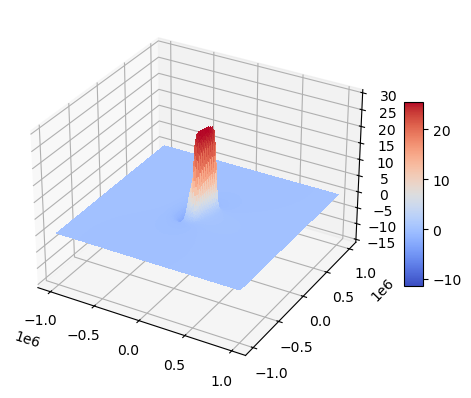

In [19]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(E,N,uZ, cmap=cm.coolwarm, antialiased=False, rstride=1, cstride=1)

# Customize the z axis.
ax.set_zlim(-15, 30.0)
ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

In [20]:
plt.close("all")




In [21]:
from numpy import meshgrid, linspace
from numpy.linalg import norm
import okada_subfaults
import okada

E_extent = 500000;
N_extent = 700000;
E_n_extent = 201; 
N_n_extent = 201; 

E,N = meshgrid(linspace(-E_extent,E_extent,E_n_extent), linspace(-N_extent,N_extent,N_n_extent))

L=300000;
W=150000;
D=32000;

strike=195;
dip=14;
rake=87;

slip=62;
opening=0.0;

E_subfault=3;
N_subfault=8;



# the displacements of the big fault

params = dict(x=E, y=N, xoff=0.0, yoff=0.0,
              depth=D, length=L, width=W, 
              slip=slip, opening=slip/10, 
              strike=strike, dip=dip, rake=rake,
              nu=0.25)

uE, uN, uZ = okada.forward(**params)

uE_sum, uN_sum, uZ_sum = okada_subfaults.forward(**params, E_subfault=E_subfault, N_subfault=N_subfault)

#print(uZ)

# use 2-norm to evaluate the error of displacements between fault and the sum of each subfaults
test_E=norm(uE_sum-uE)
test_N=norm(uN_sum-uN)
test_Z=np.max(np.abs(uZ_sum-uZ))

print(test_E, test_N, test_Z)

6.976988335851727e-11 1.8742248479572226e-11 5.658039314848651e-11


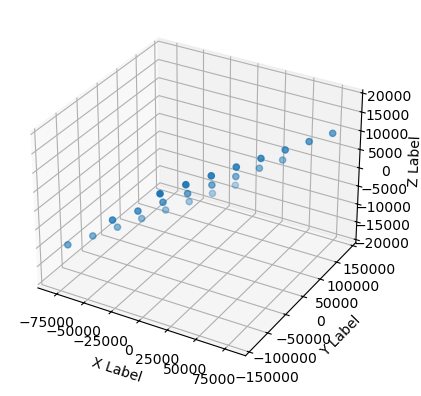

In [22]:
from numpy import reshape

epicenters_E, epicenters_N, epicenters_D = okada_subfaults.subfaults(E_subfault, N_subfault, dip, strike, L, W)

NM = E_subfault*N_subfault
vector_E=reshape(epicenters_E, (1,NM))
vector_N=reshape(epicenters_N, (1,NM))
vector_D=reshape(epicenters_D, (1,NM))
                 
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np
                 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
                 
ax.scatter(vector_E, vector_N, vector_D, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_zlim(-20000, 20000.0)
plt.show()

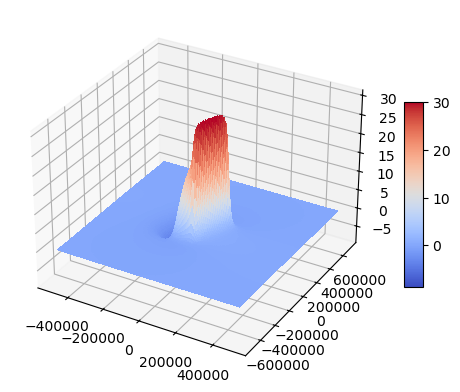

In [23]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(E,N,uZ_sum, cmap=cm.coolwarm, antialiased=False, rstride=1, cstride=1)

# Customize the z axis.
#ax.set_zlim(-15, 30.0)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

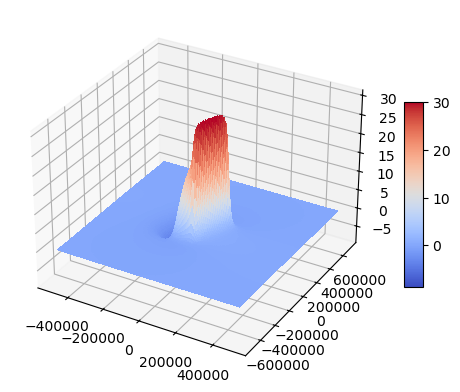

In [24]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(E,N,uZ, cmap=cm.coolwarm, antialiased=False, rstride=1, cstride=1)

# Customize the z axis.
#ax.set_zlim(-15, 30.0)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

32.96672067573553


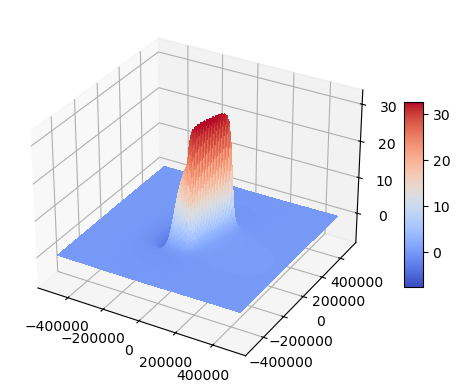

In [25]:
L=300000.0;
W=150000.0;
D=32000.0;

dip=14;
strike=195;
rake=87;
slip=62;
opening=10.0;

extent = 500000;
n_extent = 201; 

E,N = meshgrid(linspace(-extent,extent,n_extent), linspace(-extent,extent,n_extent))


params = dict(x=E, 
              y=N, 
              xoff=0.0, 
              yoff=0.0,
              depth=D, 
              length=L, 
              width=W, 
              slip=slip, 
              opening=opening, 
              strike=strike, 
              dip=dip, 
              rake=rake,
              nu=0.25)

uE,uN,uZ = okada.forward(**params);

#print(E)
#print(N)
#print(uE)
#print(uN)
#print(uZ)

print(np.max(np.abs(uZ)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(E,N,uZ, cmap=cm.coolwarm, antialiased=False, rstride=1, cstride=1)

# Customize the z axis.
#ax.set_zlim(-15, 30.0)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()
